In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import bs4
import pandas
from urllib import request
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

# 1. Importation et travail sur les bdd

In [2]:
#df=pd.read_csv('WDIData.csv')
df=pd.read_csv('C:/Users/julie/Documents/ENSAE/2A/S1/python/projet/WDIData.csv')

In [3]:
df.rename(columns={'Indicator Name': 'Indicator', '2019': 'Value_2019'}, inplace=True)

In [4]:
# Base women
women=df[df.Indicator.str.contains('women', case=False)]

In [5]:
women=women[["Country Code", "Country Name", "Indicator", "Indicator Code", "Value_2019"]]
women.rename(columns={'Value_2019': 'Value_women_2019'}, inplace=True)

In [6]:
# on sélectionne le PIB par tête
df_pib=df[df['Indicator']=="GDP per capita (constant 2015 US$)"]
df_pib=df_pib[["Country Code","Value_2019"]]

### Fusion des bdd

In [7]:
df_women_gdp=women.merge(df_pib, on='Country Code', how='left')
df_women_gdp.rename(columns={'Value_2019': 'Value_gdp_2019'}, inplace=True)

In [8]:
df_women_gdp.head(5)

,Country Code,Country Name,Indicator,Indicator Code,Value_women_2019,Value_gdp_2019
0,AFE,Africa Eastern and Southern,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,93.231944,1499.256275
1,AFE,Africa Eastern and Southern,Antiretroviral therapy coverage for PMTCT (% o...,SH.HIV.PMTC.ZS,90.131889,1499.256275
2,AFE,Africa Eastern and Southern,"Contraceptive prevalence, any methods (% of wo...",SP.DYN.CONU.ZS,NaN,1499.256275
3,AFE,Africa Eastern and Southern,"Contraceptive prevalence, modern methods (% of...",SP.DYN.CONM.ZS,NaN,1499.256275
4,AFE,Africa Eastern and Southern,Demand for family planning satisfied by modern...,SH.FPL.SATM.ZS,NaN,1499.256275


# 2. Analyse des 25 variables pour étudier leur pertinence

J'ai testé toutes les variables. Celles qui ne figurent pas ci-dessous n'ont que très peu de valeurs (quelques points seulement).

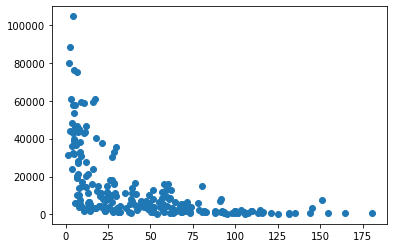

In [9]:
# Adolescent fertility rate (births per 1000 women between 15 and 19)
df_1=df_women_gdp[df_women_gdp['Indicator Code']=="SP.ADO.TFRT"]
x_1 = df_1.Value_women_2019
y_1 = df_1.Value_gdp_2019
plt.scatter(x_1, y_1)
plt.show()

In [10]:
# Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV)
#df_2=df_women_gdp[df_women_gdp['Indicator Code']=="SH.HIV.PMTC.ZS"]
#x_2 = df_2.Value_women_2019
#y_2 = df_2.Value_gdp_2019
#plt.scatter(x_2, y_2)
#plt.show()

In [11]:
# Contraceptive prevalence, any methods (% of women ages 15-49)
#df_3=df_women_gdp[df_women_gdp['Indicator Code']=="SP.DYN.CONU.ZS"]
#x_3 = df_3.Value_women_2019
#y_3 = df_3.Value_gdp_2019
#plt.scatter(x_3, y_3)
#plt.show()

In [12]:
# Contraceptive prevalence, modern methods (% of women ages 15-49)
#df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SP.DYN.CONM.ZS"]
#x_4 = df_4.Value_women_2019
#y_4 = df_4.Value_gdp_2019
#plt.scatter(x_4, y_4)
#plt.show()

In [13]:
# Demand for planning satisfied
# df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SH.FPL.SATM.ZS"]
#x_4 = df_4.Value_women_2019
#y_4 = df_4.Value_gdp_2019
#plt.scatter(x_4, y_4)
#plt.show()

In [14]:
# Pregnant women receiving prenatal care
#df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SH.STA.ANVC.ZS"]
#x_4 = df_4.Value_women_2019
#y_4 = df_4.Value_gdp_2019
#plt.scatter(x_4, y_4)
#plt.show()

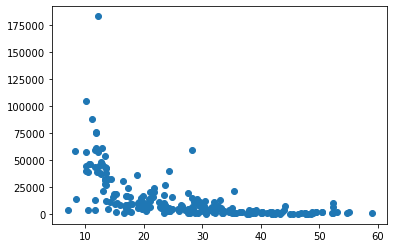

In [15]:
# Prevalence of anemia among non-pregnant women (%) 
df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SH.ANM.NPRG.ZS"]
x_4 = df_4.Value_women_2019
y_4 = df_4.Value_gdp_2019
plt.scatter(x_4, y_4)
plt.show()

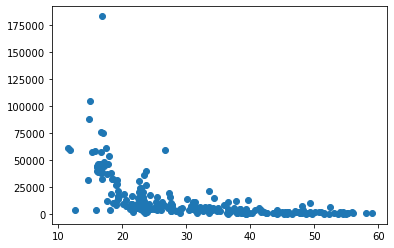

In [16]:
# Prevalence of anemia among pregnant women (%) 
df_5=df_women_gdp[df_women_gdp['Indicator Code']=="SH.PRG.ANEM"]
x_5 = df_5.Value_women_2019
y_5 = df_5.Value_gdp_2019
plt.scatter(x_5, y_5)
plt.show()

In [17]:
# Proportion of seats held by women in national parliaments 
#df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SG.GEN.PARL.ZS"]
#x_4 = df_4.Value_women_2019
#y_4 = df_4.Value_gdp_2019
#plt.scatter(x_4, y_4)
#plt.show()

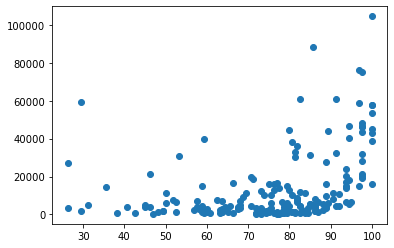

In [18]:
# Women Business and the Law Index Score (scale 1-100): The index measures how laws and regulations affect women’s economic opportunity.
# 100 = best score
df_6=df_women_gdp[df_women_gdp['Indicator Code']=="SG.LAW.INDX"]
x_6 = df_6.Value_women_2019
y_6 = df_6.Value_gdp_2019
plt.scatter(x_6, y_6)
plt.show()

In [19]:
# Women's share of population ages 15+ living with HIV (%)
#df_4=df_women_gdp[df_women_gdp['Indicator Code']=="SH.DYN.AIDS.FE.ZS"]
#x_4 = df_4.Value_women_2019
#y_4 = df_4.Value_gdp_2019
#plt.scatter(x_4, y_4)
#plt.show()

# Tests grossiers de méthodes statistiques et économétriques

On cherche à effectuer une régression linéaire du PIB par tête sur le taux de fertilité adolescente.

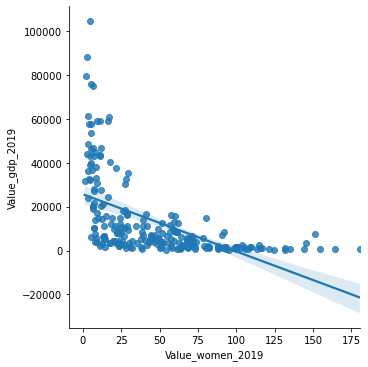

In [20]:
# Régression à une variable avec seaborn
sns.lmplot(x="Value_women_2019", y="Value_gdp_2019", data=df_1);

In [21]:
# Autre méthode (statsmodels):pour pouvoir l'utiliser, il faut supprimer les valeurs Nan 

index_with_nan = df_1.index[df_1.isnull().any(axis=1)]
index_with_nan.shape
df_1.drop(index_with_nan,0, inplace=True)

X = df_1["Value_women_2019"]
X = np.vander(X, 2)
y = df_1["Value_gdp_2019"]
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Value_gdp_2019   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     95.90
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           3.87e-19
Time:                        17:00:51   Log-Likelihood:                -2552.8
No. Observations:                 231   AIC:                             5110.
Df Residuals:                     229   BIC:                             5116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -260.7395     26.625     -9.793      0.0

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Un peu de SQL pour construire une nouvelle base et faire des RLM

Je construits ma base en choisissant les indicateurs pertinents:
- df_1: fertility adolescent rate
- df_4: anemia among non pregnant women
- df_5: anemia among pregnant women
- df_6: women business

In [22]:
df_1.rename(columns={'Value_women_2019': 'Adolescent_fertility_rate'}, inplace=True)
df_1=df_1[["Country Code", "Country Name", "Adolescent_fertility_rate", "Value_gdp_2019"]]

df_4=df_4[["Country Code", "Value_women_2019"]]
df_4.rename(columns={'Value_women_2019': 'Value_anemia_non_pregnant'}, inplace=True)

df_5=df_5[["Country Code", "Value_women_2019"]]
df_5.rename(columns={'Value_women_2019': 'Value_anemia_pregnant'}, inplace=True)

df_6=df_6[["Country Code", "Value_women_2019"]]
df_6.rename(columns={'Value_women_2019': 'Business'}, inplace=True)

C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [30]:
df_merge=df_1.merge(df_4, on='Country Code', how='left')
df_merge2=df_merge.merge(df_5, on='Country Code', how='left')
df_merge3=df_merge2.merge(df_6, on='Country Code', how='left')

In [29]:
# on supprime les nans
index_with_nan = df_merge3.index[df_merge3.isnull().any(axis=1)]
index_with_nan.shape
df_merge3.drop(index_with_nan,0, inplace=True)

In [27]:
df_matrice_corr=df_merge3[["Value_gdp_2019","Adolescent_fertility_rate", "Value_anemia_non_pregnant", "Value_anemia_pregnant", "Business" ]]

<AxesSubplot:>

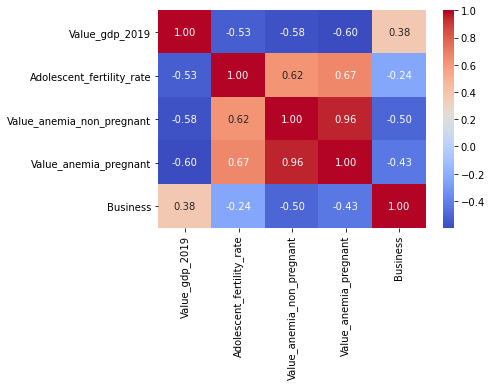

In [28]:
sns.heatmap(df_matrice_corr.corr(), cmap='coolwarm', annot=True, fmt=".2f")

Les variables d'anémie semblent extrêmment corrélées entre elles. 

In [31]:
X = df_matrice_corr[["Adolescent_fertility_rate", "Value_anemia_non_pregnant", "Value_anemia_pregnant", "Business"]]
X = sm.add_constant(X) # une autre façon d'ajouter une constante 
y = df_matrice_corr["Value_gdp_2019"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Value_gdp_2019   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     29.34
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.68e-18
Time:                        17:08:38   Log-Likelihood:                -1902.3
No. Observations:                 173   AIC:                             3815.
Df Residuals:                     168   BIC:                             3830.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Ces variables commencent à bien expliquer la variance totale du modèle (R^2=0,4)
Tous les coefficients sont statistiquement significatifs au seuil de 5% sauf "Value_anemia_non_pregnant". 

ATTENTION à ne pas mettre trop de variables parasistes et trop fortement corrélées entre elles pour ne pas "polluer" le modèle.